# Dataset information:
Fashion MNIST was introduced in August 2017, by research lab at Zalando Fashion.
It's goal is to serve as a new benchmark for testing machine learning algorithms, as MNIST became too easy and overused. While MNIST consists of handwritten digits, Fashion MNIST is made of images of 10 different clothing objects. Each image has the following properties:

Its size is 28 × 28 pixels.
Rotated accordingly and represented in grayscale, with integer values ranging from 0 to 255.
Blank space represented by black color and having value 0.
In the dataset, we distinguish between the following clothing objects:

1)    T-shirt/Top  👕

2)    Trousers      👖

3)    Pullover     

4)    Dress     💃

5)    Coat      🧥

6)    Sandal     👡

7)    Shirt      👕

8)    Sneaker     👟
 
9)    Bag       👛

10)   Ankle Boot    🦶️

the dataset cosists from 60000 train images and 10000 images for test

# Importing neccessery libraries:

In [82]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn import tree, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict, GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from termcolor import colored
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# for predicting the classification of an image we need to go over the next steps:

1) load the data.

2) reasize the data, for better understanding of the computer (for example: from 2d ---> 1d, pca and so on..)+ visualize the data.

3) scale the values of the pixels to [0,255] range.

4) select models for the prediction in the end.

5) run the pre trained models.

6) display the results of every model.

7) ensemble the models and use the best ensemble for predicting.

# loading the data from tensorflow:

In [3]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, Y_train),(X_test, Y_test) = fashion_mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

# reasize the data:
as we can see, our data has 2 dimensions, we can convert it into 1 dimensions and work with the data better.

We can notice that every image is an array of 28*28 so let's change it to size 784.

why we can do so?

the computer does not understand that the picture is shoe or sandal.

for him, it is a pixels aranged with order (28*28), so it's not matter, and much better to work with.

In [5]:
arr_train = X_train.reshape(60000, 28*28)
df_train = pd.DataFrame(arr_train)
df_train

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,66,54,50,5,0,1,0,0,0,0


In [6]:
df_train.shape

(60000, 784)

In [7]:
X_test.shape

(10000, 28, 28)

as we expected we need to do so for the test set :

In [8]:
arr_test = X_test.reshape(10000, 28*28)
df_test = pd.DataFrame(arr_test)
df_test

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,2,3,0,3,174,189,67,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,164,58,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,21,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,2,0,1,1,0,0,0,...,71,12,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,31,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,27,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df_test.shape

(10000, 784)

now lets visualize the Y_train to learn more about him:

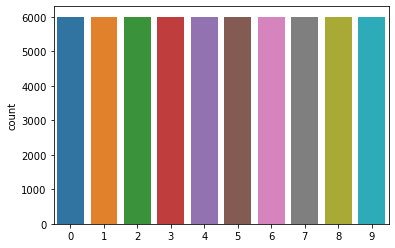

In [10]:
g = sns.countplot(Y_train)

as we can see, the Y_train divided into 10 categories (sandal, ankle boot, shirt and so on...), every category has exactly 6000 images for training.

# now lets plot some of the data to learn more about him:

In [11]:
Names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

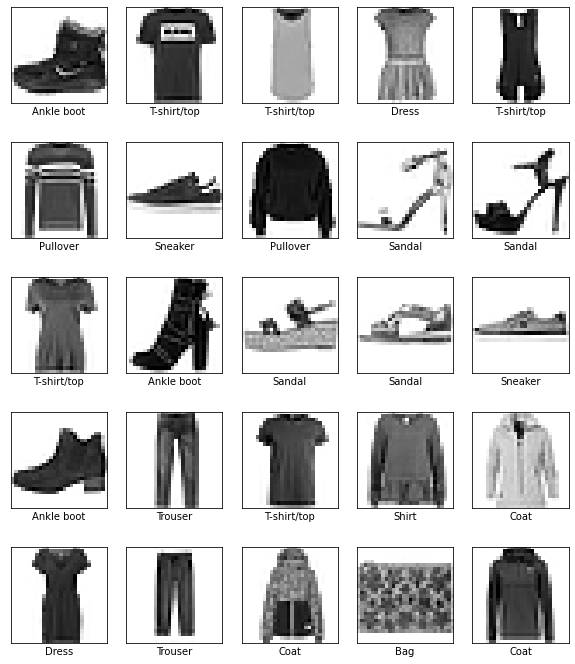

In [12]:
plt.figure(figsize=(10,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(Names[Y_train[i]])
plt.show()

what we can learn from this plot?
for true, not too much, but it's fun to see some of the train images and the computer classify them. 

now we want to scale the data into [0,255] 

In [13]:
max_element = np.max(X_train)
min_element = np.min(X_train)
print('maximum element in the array is:',
      max_element)
print('minimum element in the array is:',
      min_element)

maximum element in the array is: 255
minimum element in the array is: 0


but we can see that the values are between 0-255 so wee don't have to scale it 😎

# pca- principle component analysys:

why do we need this?

because we got a 60000 images for train, each image has a 784 dimensions and it's hard to work with. 

So what we gonna do, is to reduce the number of dimensions with try to keep as much as we can variance for the real dataset. 

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
X_reduced = pca.fit_transform(df_train)
X_recovered = pca.inverse_transform(X_reduced)

In [15]:
X_reduced.shape

(60000, 187)

we need to do so for the test set, but! not with fit, just transform:

In [16]:
Y_reduced = pca.transform(df_test)

In [17]:
Y_reduced.shape
##see if i need this

(10000, 187)

We choose n_componenets = 0.95 beacause it is save 95% from the variance of the data exactly as we want.

So, we reduced the number of dimensions in the train from 784 to 187 with 95% save of the variance!!

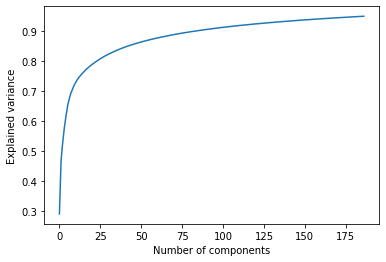

In [18]:
plt.plot (np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.savefig('elbow_plot.png', dpi = 100)


as we can see, we plot the n_components and the variance accordingly to the components. and the variance go up when n_components goes up to.

In [19]:
pca.explained_variance_ratio_
## that function tells us the variability of any component by itself.

array([0.29039228, 0.1775531 , 0.06019222, 0.04957428, 0.03847655,
       0.03460769, 0.02341691, 0.01905414, 0.01349843, 0.01314267,
       0.00992875, 0.00913255, 0.00765793, 0.00659706, 0.00607851,
       0.00589821, 0.00551934, 0.005245  , 0.00458079, 0.00455515,
       0.00433684, 0.00407097, 0.00384758, 0.00372551, 0.00361107,
       0.00350656, 0.00333241, 0.0031936 , 0.00308063, 0.00293273,
       0.00275603, 0.00265062, 0.00263703, 0.00255835, 0.00246212,
       0.00235901, 0.0023029 , 0.00225522, 0.00218476, 0.00209324,
       0.00200282, 0.0019574 , 0.00194689, 0.00182783, 0.00175354,
       0.00171926, 0.00168792, 0.00163975, 0.00160908, 0.00154846,
       0.00152295, 0.00150044, 0.00146795, 0.00143312, 0.00138277,
       0.00136997, 0.00131154, 0.00128846, 0.00127249, 0.00125851,
       0.00121452, 0.00120198, 0.00118143, 0.00116257, 0.00115583,
       0.00112295, 0.00111075, 0.00109669, 0.00105128, 0.00104659,
       0.001031  , 0.00101051, 0.00097795, 0.00095689, 0.00093

In [20]:
np.cumsum(pca.explained_variance_ratio_*100)
## Also, note that the values of the array are sorted in descending order.

array([29.03922792, 46.7945379 , 52.81375988, 57.77118789, 61.61884303,
       65.07961235, 67.42130287, 69.3267165 , 70.67655995, 71.99082704,
       72.9837022 , 73.8969571 , 74.66274966, 75.32245523, 75.93030594,
       76.52012741, 77.0720617 , 77.59656153, 78.05464046, 78.51015518,
       78.94383874, 79.3509362 , 79.73569421, 80.10824561, 80.46935229,
       80.82000848, 81.15324966, 81.47260944, 81.78067217, 82.07394504,
       82.34954775, 82.61460969, 82.87831305, 83.13414836, 83.38036064,
       83.61626191, 83.84655182, 84.07207417, 84.29055014, 84.49987422,
       84.70015663, 84.89589629, 85.09058563, 85.27336882, 85.44872305,
       85.62064925, 85.78944094, 85.95341576, 86.11432373, 86.26917003,
       86.42146539, 86.57150976, 86.71830517, 86.86161748, 86.99989441,
       87.13689125, 87.26804559, 87.39689178, 87.52414099, 87.64999229,
       87.77144478, 87.89164326, 88.0097864 , 88.12604385, 88.24162671,
       88.35392211, 88.46499735, 88.57466646, 88.6797943 , 88.78

In [21]:
print( "variance explained by the first principal componenet = ",
     np.cumsum (pca.explained_variance_ratio_*100)[0])
print( "variance explained by the first 50 principal componenet = ",
     np.cumsum (pca.explained_variance_ratio_*100)[50])
print( "variance explained by the first 100 principal componenet = ",
     np.cumsum (pca.explained_variance_ratio_*100)[100])
print( "variance explained by the first 150 principal componenet = ",
     np.cumsum (pca.explained_variance_ratio_*100)[150])
print( "variance explained by the first 183 principal componenet = ",
     np.cumsum (pca.explained_variance_ratio_*100)[182])

variance explained by the first principal componenet =  29.039227921366017
variance explained by the first 50 principal componenet =  86.42146538978565
variance explained by the first 100 principal componenet =  91.29985274938072
variance explained by the first 150 principal componenet =  93.78776665623919
variance explained by the first 183 principal componenet =  94.88112378778594


Now let's see what does the pca doing, we gonna use an example for explaining that.

non-compressed image


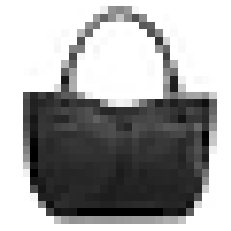

In [22]:
import matplotlib as mpl
import matplotlib.pyplot as plt

print('non-compressed image')
plt.imshow(X_train[100].reshape(28, 28), cmap="binary")
plt.axis("off")
plt.show()

95% variance compressed image


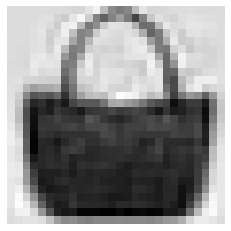

In [23]:
print('95% variance compressed image')
plt.imshow(X_recovered[100].reshape(28,28), cmap="binary")
plt.axis("off")
plt.show()

we can see that in the two pictures we have a bag, one picture with the real data (784 dimensions) and the second with the data after pca (with 187 dimensions only) and it's seems the same, but for the computer it is much better data to work with and less complicated.

# $\color{darkmagenta}{\text{The models:}}$


# $\color{darkorchid}{\text{Gradient boosting classifier:}}$

Gradient boosting is an ensemble model which take weak learners and combined them to a strong learner.

in this algorithem we take every iteration only the residuals of the previous model and that's the reason why this model don't 

run parallel, beacause he waiting for the previous model to finish.

and when he finish his job? when the n_estimators are finished.

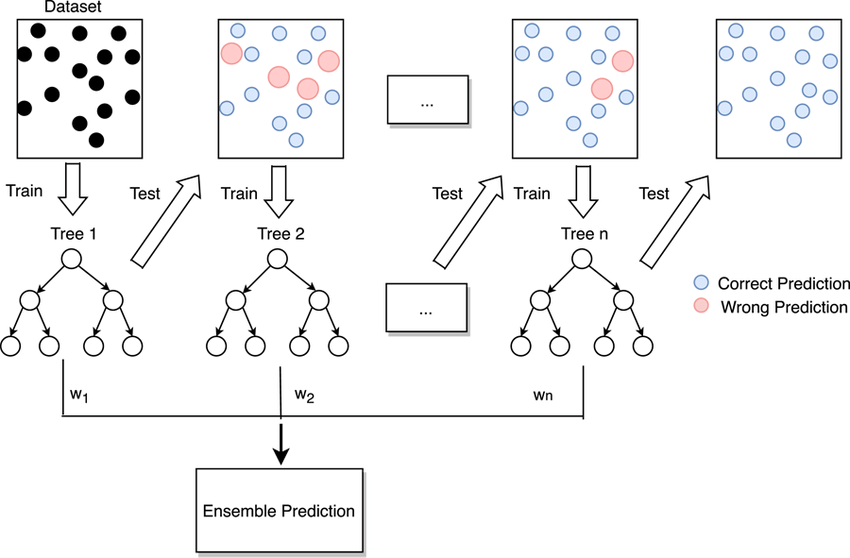

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(X_reduced, Y_train)
y_pred_boost = clf.predict(Y_reduced)




0.8363

In [48]:
print("Gradient boosting Accuracy: ", accuracy_score(Y_test, y_pred_boost))

Gradient boosting Accuracy:  0.8363


# $\color{darkorchid}{\text{Ensemble XGboost classifier:}}$

xgboost is what called "extreme gradient boosting".

this algorithm works on the base of gradient boosting, but it is much better algorithm.

it is a super power algorithm which uses in a lot of kaggle competitions and also win a lot of times.

this algorithm prevents overfiting , make the work parallel and not waiting for the previous one to finish.

Super fast, learn from his previous mistakes (gradient boosting).


In [50]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_reduced, Y_train)
y_pred_boost = xgb_model.predict(Y_reduced)


In [52]:
 accuracy_score(Y_test, y_pred_boost)

0.8733

# $\color{darkorchid}{\text{AdaBoost classifier:}}$


The AdaBoost classifier is an ensemble model which use a lot of weak learners and combined them. 

His name come from the idea that this model is an adaptive model which take the data, make a prediction. 

Next, he take the wrong points from the first prediction and do a prediction once again with higher notice on this wrong points.

And the algorithem repeat on the same process more and more until we tell him to stop.

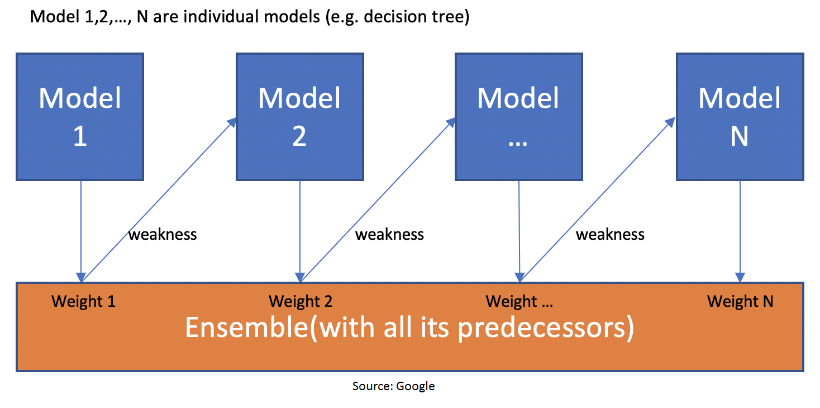

In [38]:
 from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)
model_ada = abc.fit(X_reduced, Y_train)

In [40]:
y_pred_ada = model_ada.predict(Y_reduced)
print("AdaBoost Classifier Accuracy: ",accuracy_score(Y_test, y_pred_ada))

AdaBoost Classifier Accuracy:  0.5746


# $\color{darkorchid}{\text{Random forest classifier model:}}$


The Random Forest classifier is an ensemble of decision trees.
the idea behind this model is that ensemble of weak learners can make a strong learner.
Random Forest bags the data with replacement and creates a Decision Tree from each data. While predicting, it gets answers from all the trees and takes the majority results as the final prediction.
Let's make our understanding cleaner by a picture.

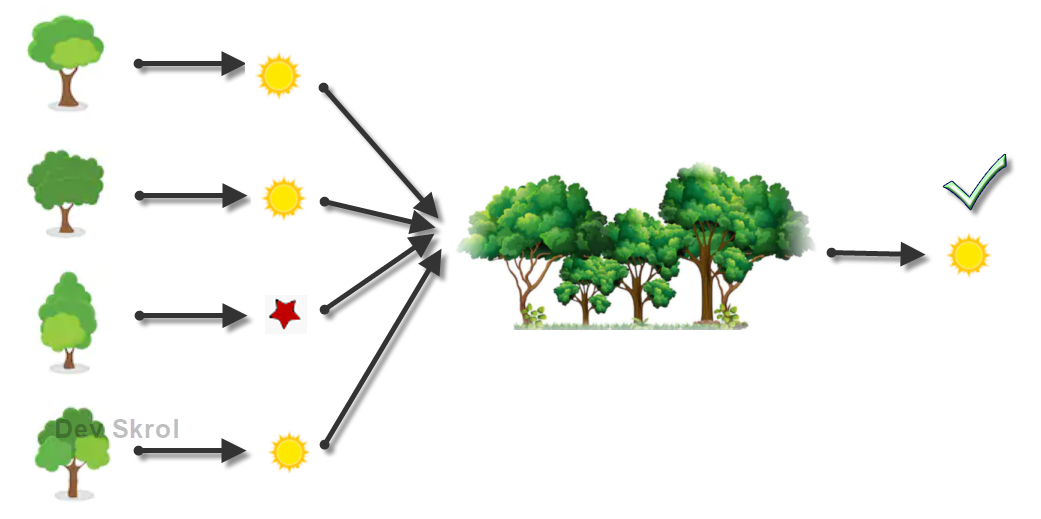

In [58]:
model2 = RandomForestClassifier(n_estimators = 100)
model2.fit(X_reduced, Y_train)

RandomForestClassifier()

In [59]:
pred = model2.predict(Y_reduced)
print("Random forest Accuracy: ", accuracy_score(Y_test, pred))

Random forest Accuracy:  0.8605


it seems that random forest play like gradient boosting but there are some main diffrences between the 2 models, like:

1)How trees are built: random forests builds each tree independently while gradient boosting builds one tree at a time.

2)Combining results: random forests combine results at the end of the process (by averaging or “majority rules”) while gradient boosting combines results along the way.

# $\color{darkorchid}{\text{knn classifier model:}}$

Explaining the KNN model:
knn is known as k nearest neighbors.
The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.
this algorithem classify new instance with the nearest neighbor after we choose the number of k we want him to classify.
for better understanding we use a picture, as they say : "one picture worth much better from 1000 of words".

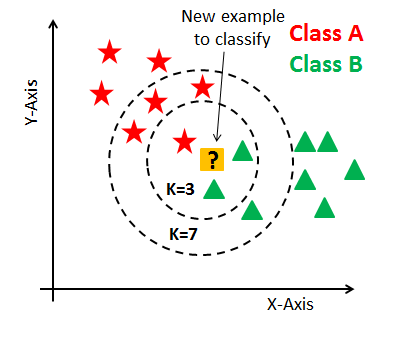

In [60]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_reduced, Y_train)
y_pred = classifier.predict(Y_reduced)
accuracy_score(Y_test, y_pred)

0.8623

# $\color{blueviolet}{\text{Tuning the model using grid search:}}$

In [68]:
k_range = list(range(1,10))

In [69]:
param_grid = dict(n_neighbors=k_range)
grid=GridSearchCV(classifier, param_grid, cv=10, scoring='accuracy')
grid.fit(X_reduced,Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='accuracy')

In [70]:
print(grid.best_index_)
print(grid.best_params_)

7
{'n_neighbors': 8}


In [71]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 8)
classifier.fit(X_reduced, Y_train)
y_pred = classifier.predict(Y_reduced)
accuracy_score(Y_test, y_pred)

0.8624

# $\color{darkorchid}{\text{ensemble with  soft voting:}}$

let's do a soft voting with 3 algorithms:

1) knn.

2) RandomForest

3) XGBoost

In [74]:
clf1=KNeighborsClassifier()
clf2=RandomForestClassifier(random_state=42) 
clf3=xgb.XGBClassifier()
labels=['Knn','Random forest','xgboost']
voting_clf_soft= VotingClassifier(estimators=[(labels[0],clf1),
                                            (labels[1],clf2),
                                            (labels[2],clf3)],
                                 voting='soft', n_jobs = -1)

In [79]:
voting_clf_scores = []
scores= cross_val_score(clf,X_reduced,Y_train,cv=5,scoring='accuracy')
voting_clf_scores.append(scores.mean())

In [78]:
print('Accuracy of '+ label+':', scores.mean(),'%')
voting_clf_soft_score = voting_clf_scores[0]

Accuracy of Voting Classifier Soft: 0.8851833333333333 %


In [94]:
models = ['knn','RandomForest', 'xgboost', 'voting_model', "gradient boosting"]

amazing!!!!!!!!!!!!!

# confusion matrix:

We were try to make a confusion metrix but the computer was collapsed so...

# To conclusion:

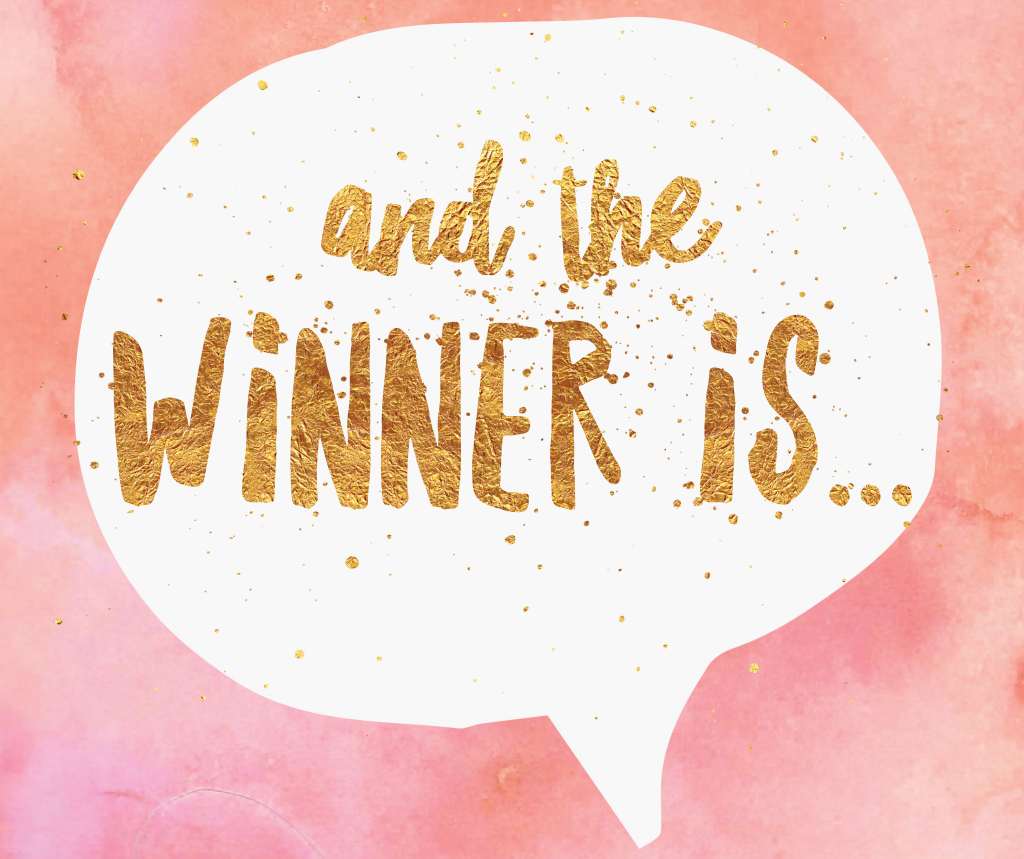

# soft voting with Knn, RandomForest, and XGBoost with 88.5%!!!